In [1]:
from sklearn.datasets import load_digits
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.manifold import TSNE

In [2]:
digits = load_digits()
print(type(digits))

<class 'sklearn.utils.Bunch'>


Bunch: Similar to a dict, it contains key-value pairs.

In [3]:
print(digits.keys())

dict_keys(['data', 'target', 'frame', 'feature_names', 'target_names', 'images', 'DESCR'])


In [4]:
digits.target[::100]

array([0, 4, 1, 7, 4, 8, 2, 2, 4, 4, 1, 9, 7, 3, 2, 1, 2, 5])

In [5]:
digits.data.shape

(1797, 64)

In [6]:
digits.target.shape

(1797,)

In [7]:
digits.images[13]


array([[ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.],
       [ 0.,  4., 13.,  8.,  9., 16.,  8.,  0.],
       [ 0.,  0.,  0.,  6., 14., 15.,  3.,  0.],
       [ 0.,  0.,  0., 11., 14.,  2.,  0.,  0.],
       [ 0.,  0.,  0.,  2., 15., 11.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  2., 15.,  4.,  0.],
       [ 0.,  1.,  5.,  6., 13., 16.,  6.,  0.],
       [ 0.,  2., 12., 12., 13., 11.,  0.,  0.]])

In [8]:
digits.data[13]

array([ 0.,  2.,  9., 15., 14.,  9.,  3.,  0.,  0.,  4., 13.,  8.,  9.,
       16.,  8.,  0.,  0.,  0.,  0.,  6., 14., 15.,  3.,  0.,  0.,  0.,
        0., 11., 14.,  2.,  0.,  0.,  0.,  0.,  0.,  2., 15., 11.,  0.,
        0.,  0.,  0.,  0.,  0.,  2., 15.,  4.,  0.,  0.,  1.,  5.,  6.,
       13., 16.,  6.,  0.,  0.,  2., 12., 12., 13., 11.,  0.,  0.])

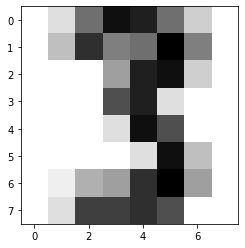

In [9]:
plt.imshow(digits.images[13],cmap=plt.cm.gray_r, interpolation='nearest')
plt.show()

Recall that NumPy array method ravel creates a one­dimensional view of a
multidimensional array. Also, recall that zip produces tuples containing elements from
the same index in each of zip’s arguments and that the argument with the fewest
elements determines how many tuples zip returns.
Each iteration of the loop:
Unpacks one tuple from the zipped items into three variables representing the
Axes object, image and target value.
Calls the Axes object’s imshow method to display one image. The keyword
argument cmap=plt.cm.gray_r determines the colors displayed in the image.
The value plt.cm.gray_r is a color map—a group of colors that are typically
chosen to work well together. This particular color map enables us to display the
image’s pixels in grayscale, with 0 as white, 16 as black and the values in between as
gradually darkening shades of gray

Calls the Axes object’s set_xticks and set_yticks methods with empty lists to
indicate that the x­ and y­axes should not have tick marks.
Calls the Axes object’s set_title method to display the target value above the
image—this shows the actual value that the image represents.
After the loop, we call tight_layout to remove the extra whitespace at the Figure’s
top, right, bottom and left, so the rows and columns of digit images can fill more of the
Figure.

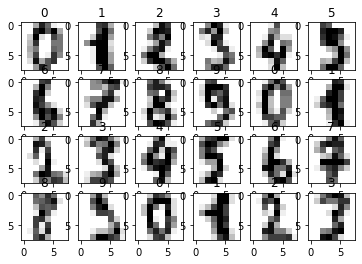

In [10]:
figure, axes = plt.subplots(nrows=4, ncols=6, figsize=(6, 4))
for item in zip(axes.ravel(), digits.images, digits.target):
  axes, image, target = item
  axes.imshow(image, cmap=plt.cm.gray_r)
  #axes.set_xticks([]) # remove x­axis tick marks
  #axes.set_yticks([]) # remove y­axis tick marks
  axes.set_title(target)
plt.show()

In [11]:
X = np.array(digits.data)
y = np.array(digits.target)

In [12]:
n_components = 2
model = TSNE(n_components)
transformed = model.fit_transform(X)
transformed.shape

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:783: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,


(1797, 2)

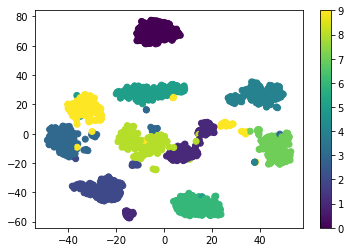

In [13]:
xs = transformed[:,0]
ys = transformed[:,1]
dots = plt.scatter(xs, ys,c=y)
colorbar = plt.colorbar(dots)

In [14]:
steps = [
         ('scaler',StandardScaler()),
         ('knn',KNeighborsClassifier())]
pipeline = Pipeline(steps)
parameters = { 'knn__n_neighbors':np.arange(1,50)}

In [15]:
X_train, X_test, y_train, y_test = train_test_split(transformed, y, test_size=0.3, random_state=11)
cv = GridSearchCV(pipeline,param_grid=parameters,cv=5)

In [16]:
X_train.shape

(1257, 2)

In [17]:
X_test.shape

(540, 2)

In [18]:
cv.fit(X_train,y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid={'knn__n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49])})

In [19]:
y_pred = cv.predict(X_test)

In [ ]:
print(cv.best_params_)

{'knn__n_neighbors': 4}


In [ ]:
print(cv.score(X_test,y_test))

0.9851851851851852


In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        49
           1       0.96      1.00      0.98        54
           2       1.00      1.00      1.00        61
           3       1.00      0.95      0.97        55
           4       0.98      1.00      0.99        58
           5       1.00      1.00      1.00        51
           6       1.00      1.00      1.00        57
           7       0.98      0.98      0.98        52
           8       0.94      0.96      0.95        51
           9       0.98      0.96      0.97        52

    accuracy                           0.99       540
   macro avg       0.99      0.98      0.98       540
weighted avg       0.99      0.99      0.99       540



In [ ]:
confusion = confusion_matrix(y_test, y_pred)
confusion

array([[49,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 54,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 61,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 52,  0,  0,  0,  1,  2,  0],
       [ 0,  0,  0,  0, 58,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 51,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0, 57,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 51,  0,  1],
       [ 0,  2,  0,  0,  0,  0,  0,  0, 49,  0],
       [ 0,  0,  0,  0,  1,  0,  0,  0,  1, 50]])